In [118]:
import sys
!{sys.executable} -m pip install kneed

In [119]:
import pandas as pd
df_ori = pd.read_csv('Mall_Customers.csv')
df_ori.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

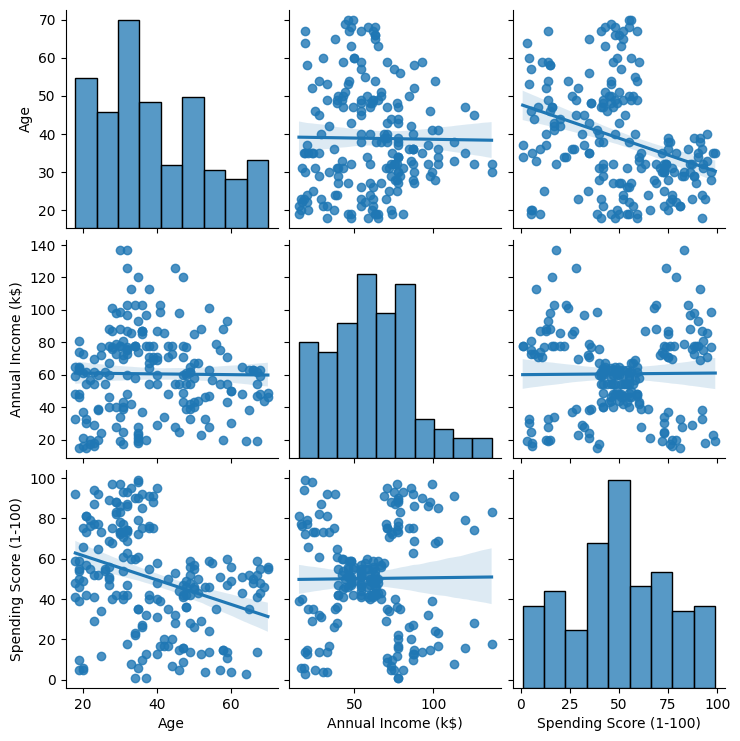

In [120]:
import seaborn as sns

df = df_ori[['Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]
sns.pairplot(df, kind='reg')

read : Graph look like cube is diagonal graph
        : the others are scatter

from pairplot
1. i have no idea if there any linear corr here. because when i add kind='reg', the line always go down at the end and horizontally upright

2. But if you see relation between annual income and spending score (row 2, third column), there are unique look. its clustered into 5 pieces. up right, up left. middle, down right, down left.


from here i can interpret :

a. up right : those who have annual income and spending score very high (rich people but shopabolic) -> normal

b. up left :  those who have annual income very high but low spending score (rich people but ecomonical) -> smart

c. middle : those who have average income and average spending score (middle people but shopabolic) - > normal

d. down right : those who have spending score very high but their income are low (not rich people but shopabolic) -> bellow average

e. down  left : those who have annual income low and spending their money effectivly (not rich peple but ecomonical) -> normal



In [121]:
# df = df[['Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']]
# sns.heatmap(df)

In [122]:
df.head

<bound method NDFrame.head of      Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]>

In [123]:
df.describe()

Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

In [124]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

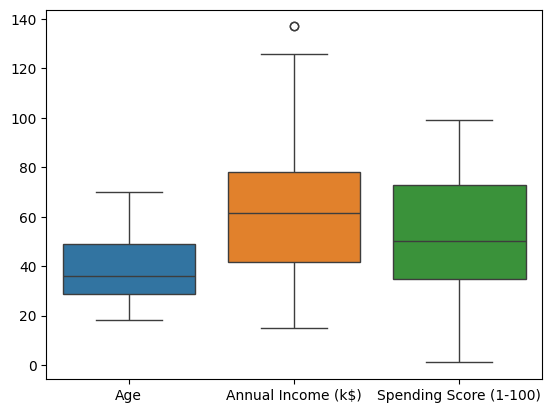

In [125]:
sns.boxplot(df)

only one? oh come on we gonna just delete it..

* update

i just read from gemini that boxplot didnt decide thats bad value or not. the machine just doing their what they can do.but all the decision
still at human.

after i see the dataset there is nothing wrong with data. cust num 199 and 200 are having annual income by 137 and thats normal. its by subjective people, differenet work differenet income.

from now i let it be....

now lets do scaling

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [127]:
# change male and female use one hot encoding

from sklearn.preprocessing import OneHotEncoder

gendercik = ['Gender']

onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

df_encoded = pd.DataFrame(
    onehot.fit_transform(df[gendercik]),
    columns=onehot.get_feature_names_out(gendercik)
)

df_sisa = df.drop(gendercik, axis=1)
df_final = pd.concat([df_sisa.reset_index(drop=True), df_encoded], axis=1)

print (df_final)


     Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0     19                  15                      39            0.0   
1     21                  15                      81            0.0   
2     20                  16                       6            1.0   
3     23                  16                      77            1.0   
4     31                  17                      40            1.0   
..   ...                 ...                     ...            ...   
195   35                 120                      79            1.0   
196   45                 126                      28            1.0   
197   32                 126                      74            0.0   
198   32                 137                      18            0.0   
199   30                 137                      83            0.0   

     Gender_Male  
0            1.0  
1            1.0  
2            0.0  
3            0.0  
4            0.0  
..           ...  
195          0

1 = male
0 = female

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

df_scaled

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

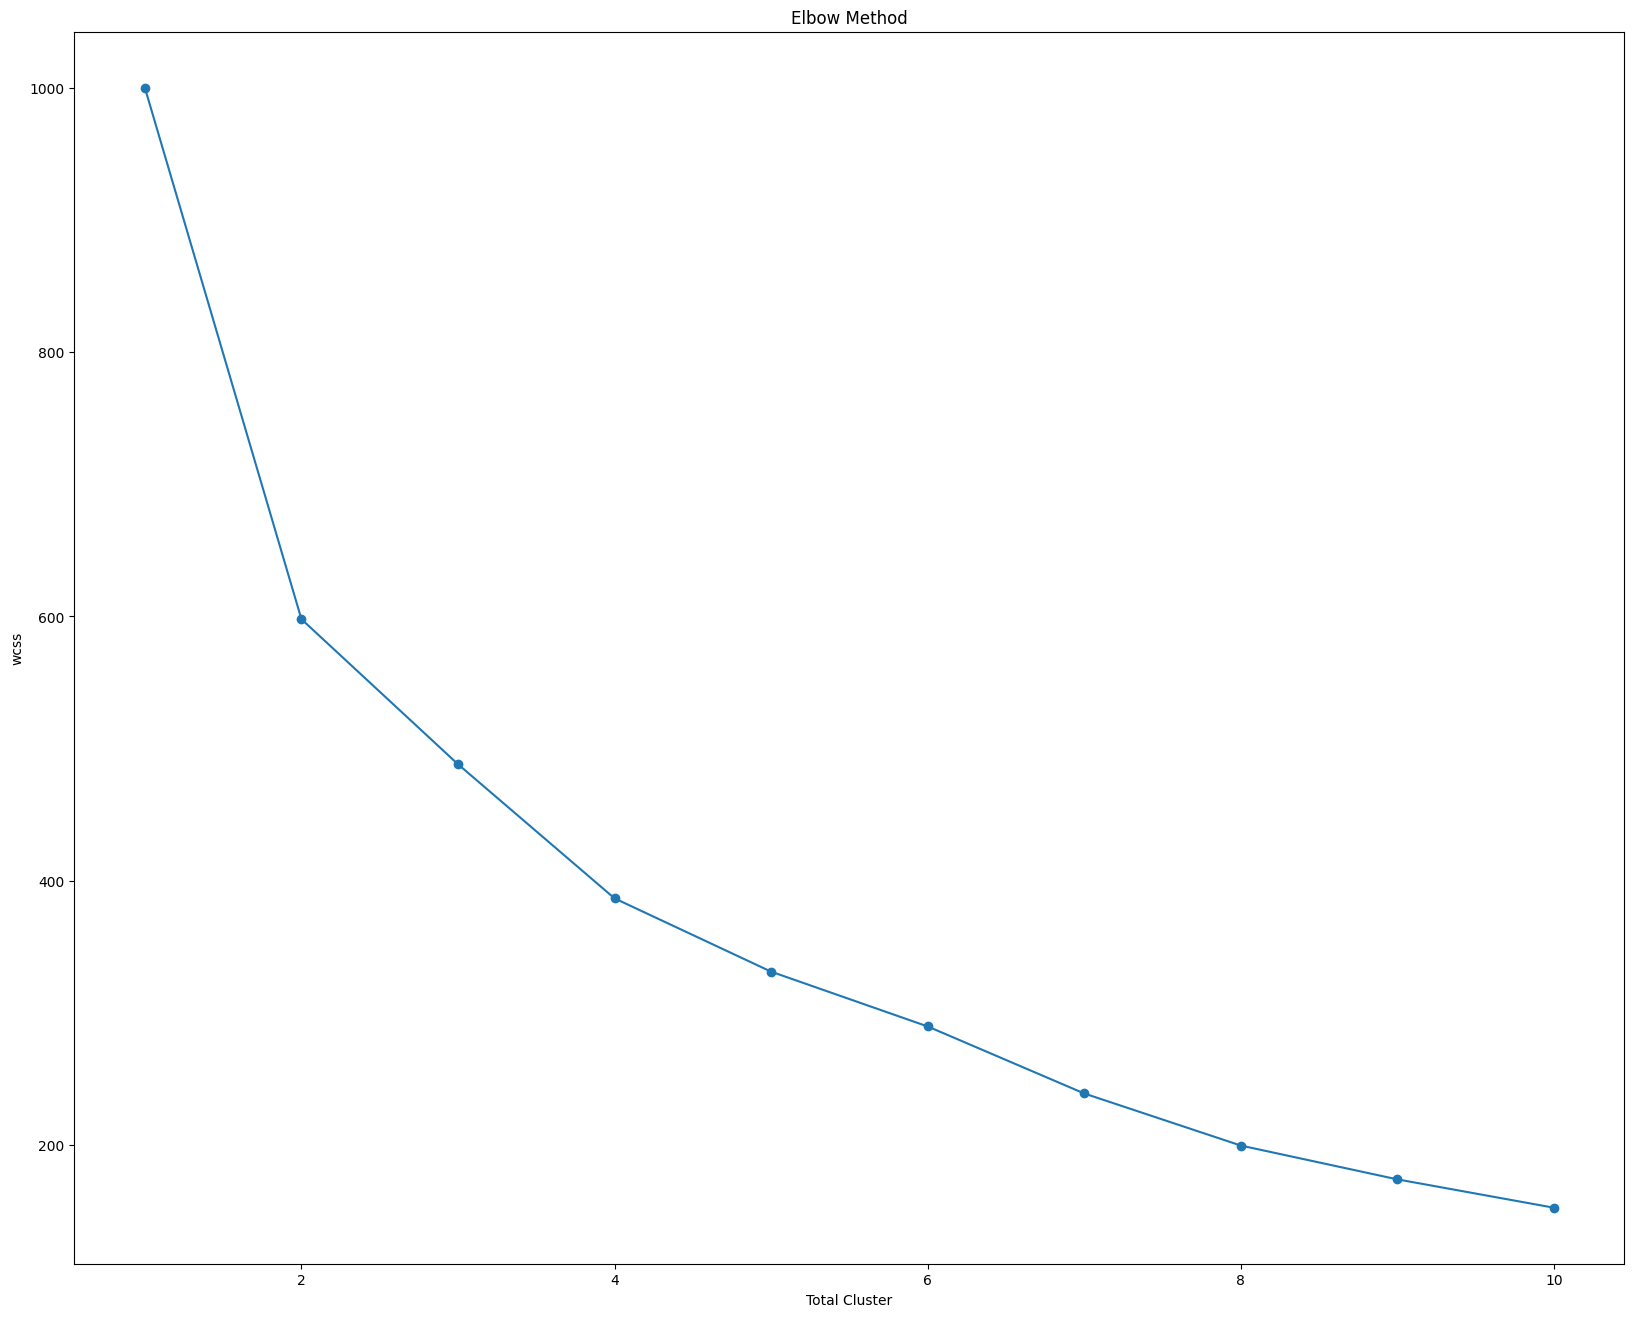

In [129]:
from sklearn.cluster import KMeans

wcss = []
for k in range (1, 11): 
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=55)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))
plt.plot(range(1,11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Total Cluster")
plt.ylabel("wcss")
plt.show()

In [130]:
#try kneed

from kneed import KneeLocator
k_values = range (1,11)

kneedle = KneeLocator(
    x=k_values,
    y = wcss,
    curve='convex', # kalo grapik berbentuk n bukan u maka pake concave
    direction='decreasing'
)

k_bagus = kneedle.elbow
print (k_bagus)


4


alr we gor 4 cluster here

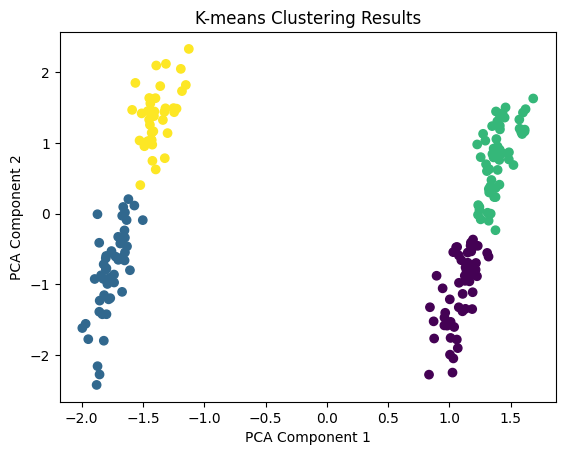

ok
Silhoutte Skor : 0.33269643434208473 
ok suree


In [131]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=33)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_
 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.scatter(pca_result[:, 0], pca_result[:,1], c = df['Cluster'], cmap='viridis')
plt.title("K-means Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

df.to_csv("wildestdream.csv")
print ("ok")

# check siloute
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df_scaled, kmeans.labels_)
print(f"Silhoutte Skor : {sil_score} ")


df_ori['Cluster'] = df['Cluster']
df_ori.to_csv("ClusteredFixCustom.csv")
print ("ok suree")

clus 2 = Silhoutte Skor : 0.39644160577705434 

clus 3 = Silhoutte Skor : 0.36782472313835896 

clus 4 = 0.33269643434208473 

clus 5 = Silhoutte Skor : 0.3462618438920992 

clus 6 = Silhoutte Skor : 0.36195338805796723 

that is even brighter than my bathroom on my eyes

In [132]:
df_new = pd.read_csv("ClusteredFixCustom.csv")
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              200 non-null    int64 
 1   CustomerID              200 non-null    int64 
 2   Gender                  200 non-null    object
 3   Age                     200 non-null    int64 
 4   Annual Income (k$)      200 non-null    int64 
 5   Spending Score (1-100)  200 non-null    int64 
 6   Cluster                 200 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.1+ KB


In [133]:
# print (df_new[['Age','Annual Income (k$)','Spending Score (1-100)','Cluster']].groupby('Cluster').mean())


profil_cluster = df.groupby('Cluster')[['Age','Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(profil_cluster)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        48.109091           58.818182               34.781818
1        49.437500           62.416667               29.208333
2        28.438596           59.666667               67.684211
3        28.250000           62.000000               71.675000


see the thing

Cluster 0 = average 48 years old with income 58 and total spending 34

Cluster 1 = average 49 years old with income 62 and total spending 29

Cluster 2 = average 28 years old with income 59 and total spending 67

Cluster 3 = average 28 years old with income 69 and total spending 71


rich old customer spending less (Cluster 1)

average old customer spending a bit much than rich old customer (Cluster 0)

rich Young blood that has less income are spending a lot more than average old cust (Cluster 2)

rich young blood with income the highest is the highest spending at mall (Cluster 3)


INTERPRET:

1. Cluster 0 is too economic but they rich we can name it by "economical people that has enough money to buy things". we can offer them some discount but because they already a bit old maybe the offer is something related to hobby like books and something relaxing to them. also discount of membership
2. Cluster 1 still same but this one is more economical we can called "the economist sharks" we can offer them a long lasting product like massage chair, or a bike. make discount 
3. Cluster 2 young blood but they not too spending alot we can call it "The economist young blood" since they still young they still havent much experience, this time i can offer them something that might they havent tried before... like sky diving maybe or traveling offer in things maybe
4. Cluster 3 is bit same so we can call "Expensive Young Sharks" we can offer them anything related they spend on mall, even it didnt get discount

Here i have recomendation, maybe you can add married variabel because with that it will make easier to know their needs... most young parent are need baby needs too so we can give it discount

In [134]:
# challgenge from master

df_request = df_ori[['Annual Income (k$)', 'Spending Score (1-100)']]
df_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [135]:
df_scaled_req = scaler.fit_transform(df_request)

df_scaled_req

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

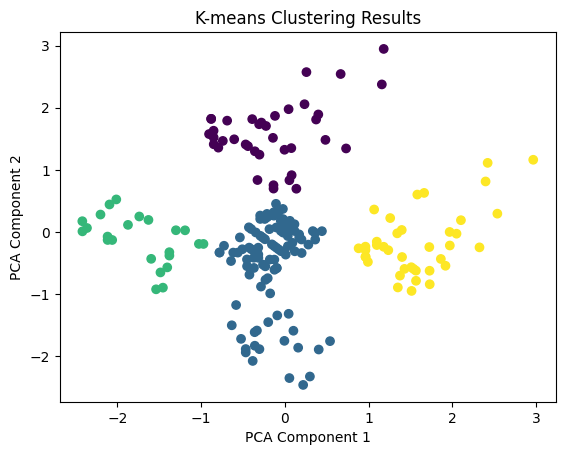

Silhoutte Skor : 0.4939069237513199 


In [136]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=33)
kmeans.fit(df_scaled_req)
df['Cluster'] = kmeans.labels_
 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled_req)

plt.scatter(pca_result[:, 0], pca_result[:,1], c = df['Cluster'], cmap='viridis')
plt.title("K-means Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# check siloute
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df_scaled_req, kmeans.labels_)
print(f"Silhoutte Skor : {sil_score} ")
